## [erratum] On bias cancellation of MCMC estimators

This is about an error on page 596, in the rejoinder of
* [JOA2020] Jacob, O'Leary, Atchadé, _[Unbiased Markov chain Monte Carlo methods with couplings](https://rss.onlinelibrary.wiley.com/doi/full/10.1111/rssb.12336)_, 2020.

Below I explain and fix the error. 

### Setting

Consider the task of approximating $\pi(h):=\int h(x)\pi(dx)$ where $\pi$ is the _target_ distribution and $h$ is the _test_ function. An MCMC algorithm generates a Markov chain $(X_t)_{t\geq 0}$, starting from an arbitrary distribution $\pi_0$, from which we can compute:

<center> $\text{MCMC}_{k:m} := \frac{1}{m-k+1}\sum_{t=k}^m h(X_t)$,
</center>

where $k$ denotes the burn-in period and $m$ the total length. The above estimator converges to $\pi(h)$ as $m\to \infty$ for any fixed $k$, with a mean squared error decreasing as $1/m$. On the other hand, for fixed values of $k$ and $m$, because the chain starts outside of stationarity, the expectation of $\text{MCMC}_{k:m}$ differs from $\pi(h)$. Because of that bias, one cannot generate many replicates of $\text{MCMC}_{k:m}$ in parallel, average the results and obtain a consistent estimate in that way, which is a shame.

### Bias cancellation

With coupled chains we can remove the bias from Markov chain ergodic averages, as proposed originally in:
* [GR2014] Glynn & Rhee, _[Exact estimation for Markov chain equilibrium expectations](https://www.cambridge.org/core/journals/journal-of-applied-probability/article/exact-estimation-for-markov-chain-equilibrium-expectations/844D4F8B0872C8516FE8B51B2BAA103B)_, 2014.

Here we recall the construction in [JOA2020], where two chains $(X_t)_{t\geq 0}$ and $(Y_t)_{t\geq 0}$ are constructed such that there exists a "meeting time" $\tau$ such that $X_t = Y_{t-1}$ for $t\geq \tau$. In that case [JOA2020] propose the bias cancellation term:

<center>$BC_{k:m}:= \frac{1}{m-k+1}\sum_{t=k+1}^{\tau-1} \omega_t \cdot \Delta_t$,</center>

where

<center> $\Delta_t = h(X_t) - h(Y_{t-1})$ and $\omega_t = \min(m-k+1, t-k)$.</center>

Then the expectation of $\text{MCMC}_{k:m}+BC_{k:m}$ is equal to $\pi(h)$. Bias cancelled, mission accomplished.

In the published discussion of [JOA2020], Paul Vanetti and [Arnaud Doucet](https://www.stats.ox.ac.uk/~doucet/) note the appeal of generalizing the construction to generate chains with a lag $L\geq 1$, such that $X_t=Y_{t-L}$ for $t\geq \tau$. 
In our rejoinder, my co-authors and I wrote the resulting bias cancellation term as

<center> $BC_{k:m}:= \frac{1}{m-k+1}\sum_{t=k+L}^{\tau-1} \omega_t \cdot \Delta_t$,
</center>

where

<center> $\Delta_t = h(X_t) - h(Y_{t-L})$ and $\omega_t = \min(m-k+1, \lceil (t-k)/L \rceil)$. </center>

**That formula is wrong**, as [Anthony Lee](https://sites.google.com/view/anthonylee) pointed out to me. The problem is in $\omega_t$, the correct formula is

<center> $\omega_t = \lfloor(t-k) / L\rfloor - \lceil \max(L, t-m)/L\rceil + 1$.</center>


### How to arrive at the correct formula

The basic idea is that the following estimator is unbiased, for any time $\ell$:

<center>$H_\ell := h(X_\ell) + \sum_{j=1}^{\infty} \{h(X_{\ell+jL}-h(Y_{\ell+(j-1)L}\}$,</center>

by a telescopic sum argument, and furthermore the terms in the sum are equal to zero for $j$ such that $\ell+jL\geq \tau$, because $X_t = Y_{t-L}$ for $t\geq \tau$.

Then, for any fixed trajectories of $(X_t)$ and $(Y_t)$, we can average $H_\ell$ over $\ell = k,\ldots,m$. The average of the terms $h(X_\ell)$ yields $\text{MCMC}_{k:m}$, while the bias cancellation is obtained as

<center>$\frac{1}{m-k+1}\sum_{\ell=k}^m \sum_{j=1}^{\infty} \{h(X_{\ell+jL}-h(Y_{\ell+(j-1)L}\}$.</center>

This features the terms $\Delta_t$ for $t\geq k+L$, with certain multiplicative weights. How do we obtain the weights?

We are looking for the number of terms of the form $\ell+jL$ that are equal to a specific $t$ in $\{k+L,\ldots,\tau -1\}$, when $\ell$ varies from $k$ to $m$ and $j\geq 1$. Note that, for a given $\ell$, there can be at most one value of $j$ such that $\ell + jL = t$. So 

<center>$\omega_t = |\{\ell \in \{k,\ldots,m\}: \exists j \geq 1: \ell+jL=t \}|$.</center>

We can re-write this as

<center>$\omega_t = |\{n \in \{t-m,\ldots,t-k\}: \frac{n}{L}\in \mathbb{Z}^+ \}|$,</center>

where $\mathbb{Z}^+$ is the set of positive integers. In other words we are counting the positive multiples of $L$ within the range $\{t-m,\ldots,t-k\}$, for any $t\geq k+L$. We can restrict that range to $\{\max(L,t-m),\ldots,t-k\}$, since we won't find a positive multiple of $L$ smaller than $L$. Now the range is between two positive integers. This yields:

<center>$\omega_t = \lfloor(t-k) / L\rfloor - \lceil \max(L, t-m)/L\rceil + 1$.</center>

Indeed for two positive integers $a\leq b$, the number of multiples of $L$ within $\{a,\ldots,b\}$ is $\lfloor b/L\rfloor - \lceil a/L\rceil + 1$. 

### Experiments

The error in the previous formula of the bias cancellation term, and how it is fixed, are next illustrated on a simple example. We consider a Gibbs sampler described in [Christian P. Robert](https://www.ceremade.dauphine.fr/~xian/)'s _[Convergence control methods for Markov chain Monte Carlo algorithms](https://projecteuclid.org/journals/statistical-science/volume-10/issue-3/Convergence-Control-Methods-for-Markov-Chain-Monte-Carlo-Algorithms/10.1214/ss/1177009937.full)_, Stat. Sci. 1995; see Example 3.1 page 239. 

In [1]:
# import package
using Random, Distributions, Plots, QuadGK, PrettyTables
# set seed
Random.seed!(123);

#### Target

Assume $z=(z_i)_{i=1}^n$ are independent Cauchy$(\theta,1)$ variables,
and $\theta\sim \text{Normal}(0,\sigma^2)$.
The target is the posterior distribution of $\theta$ given $z$ with density

<center>$\pi(\theta|z) \propto \exp(-\frac{1}{2\sigma^2}\theta^2) \prod_{i=1}^n(1+(\theta-z_i)^2)^{-1}$.</center>

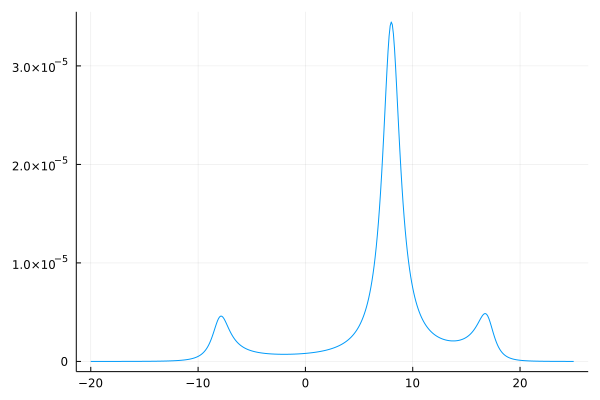

In [2]:
# prior variance
sigma2 = 100
# number of observations
n = 3
# observations
xobs = [-8, 8, 17]
# unnormalized target log-density function
function unnormalizedlogpdf(theta)
  return -theta^2/(2*sigma2) - sum(log.((1 .+ (theta .- xobs).^2)))
end
targetpdf(x) = exp.(unnormalizedlogpdf.(x))
xgrid = -20:0.1:25
pixgrid = targetpdf.(xgrid)
plot(xgrid, pixgrid, legend = false)

#### Ground truth

We consider the problem of computing the integral: $\int h(x) \pi(dx)$, with $h(x)= x^2 \cos(x)$.
We can do it precisely using adaptive Gauss-Kronrod quadrature. This gives a "ground truth".

In [3]:
# compute target normalizing constant
integral = quadgk(targetpdf, -Inf, Inf, rtol=1e-6)
normconstant = integral[1]
# define test function
h(x) = cos(x)*x^2
# compute integral of interest
integrand(x) = h.(x)*targetpdf.(x)
integral = quadgk(integrand, -Inf, Inf, rtol=1e-6)
qoi = integral[1] / normconstant
println("estimated integral of interest: ", round(qoi; digits = 4))
normalizedtargetpdf(x) = targetpdf.(x) ./ normconstant
println("check normalization: ", quadgk(normalizedtargetpdf, -Inf, Inf, rtol=1e-6)[1])

estimated integral of interest: -14.681
check normalization: 1.0


#### Gibbs sampler

From a given $\theta$, the Gibbs sampler generates a new $\theta'$ as follows:

- sample $\eta_i \sim \text{Exponential}(\frac{1+(\theta-z_i)^2}{2})$, for $i=1,\ldots,n$, 

- sample $\theta' \sim \text{Normal}(\frac{\sum_{i=1}^n \eta_i z_i}{\sum_{i=1}^n \eta_i + \sigma^2}, \frac{1}{\sum_{i=1}^n \eta_i + \sigma^2})$.


In [4]:
# one step of Gibbs sampling
# input/output: a dictionary with an entry "position"
function gibbskernel(state)
    theta = state["position"]
    etas = [rand(Exponential(1/rate)) for rate in 0.5 .* (1. .+ (theta.-xobs).^2)]
    var_ = 1. / (sum(etas) + 1. / sigma2)
    newtheta = rand(Normal(var_ * sum(etas .* xobs), sqrt(var_)))
    Dict("position" => newtheta)
end;

In [5]:
# initialization from Normal(0,1)
function rinit()
    Dict("position" => rand(Normal(0,1)))
end;

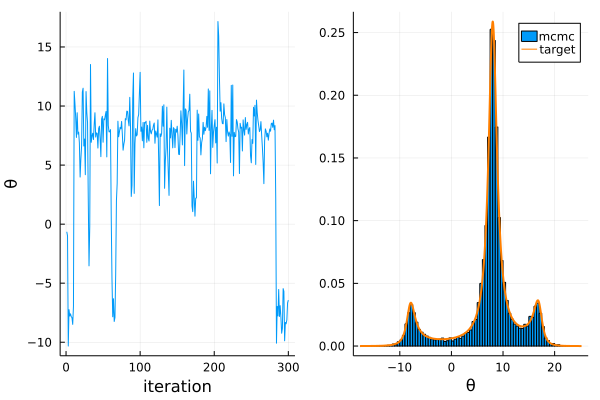

In [6]:
# run MCMC
nmcmc = 10000
thetachain = zeros(nmcmc)
state = rinit()
thetachain[1] = state["position"]
for imcmc in 2:nmcmc 
    state = gibbskernel(state)
    thetachain[imcmc] = state["position"]
end 
# trace plot of first iterations and histogram post-burnin
l = @layout [a  b]
p1 = plot(1:300, thetachain[1:300], legend = false, xlab = "iteration", ylab = "\\theta")
p2 = histogram(thetachain[200:nmcmc], label = "mcmc", normed = true, xlab = "\\theta")
p2 = plot!(normalizedtargetpdf, seriescolor=:darkorange1, label = "target", linewidth = 2)
plot(p1, p2, layout = l)

From the above, the Gibbs sampler seems to work. Next we introduce a coupling of that sampler.

#### Coupled Gibbs sampler

We couple the Gibbs sampler, using 
* common random numbers for the $\eta$-variables, which are Exponential,
* maximal coupling for the $\theta$-variables, which are Normal.

In [7]:
# Maximal coupling as in Thorisson's book
function rmax_coupling(p, q)
    identical = false
    xp = 0.;
    xq = 0.;
    x = rand(p) # draw from p
    u = rand() # draw uniform
    xp = x
    if (logpdf(p, x) + log(u) < logpdf(q, x))
        # try to accept draw from p as a draw from q
        xq = x
        identical = true
    else 
        # otherwise draw from \propto (q-\min(p,q))
        reject = true
        while reject
            xq = rand(q)
            u = rand()
            reject = (logpdf(q, xq) + log(u) < logpdf(p, xq))
        end
    end
    # return also indicator of the two draws being identical
    Dict("xp" => xp, "xq" => xq, "identical" => identical)
end;

In [8]:
## test when the two distributions are Normal and Gamma
mu1 = 1.2
sig1 = 0.7
alpha2 = 3.8
beta2 = 2.1
p = Normal(mu1, sig1)
q = Gamma(alpha2, 1. / beta2)

nrep = 100000
xps = zeros(nrep)
xqs = zeros(nrep)
identical = zeros(nrep)
Threads.@threads for irep in 1:nrep
    result = rmax_coupling(p,q)
    xps[irep] = result["xp"]
    xqs[irep] = result["xq"]
    identical[irep] = result["identical"]
end

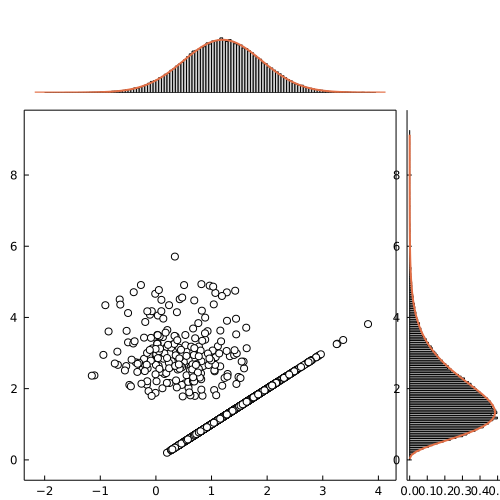

In [9]:
using Distributions, Plots
x, y = xps[1:1000], xqs[1:1000]

layout = @layout [a            _
                  b{0.8w,0.8h} c]

default(fillcolor = :lightgrey, markercolor = :white, grid = false, legend = false)
plot(layout = layout, link = :both, size = (500, 500), margin = -10Plots.px)
scatter!(x,y, subplot = 2, framestyle = :box)
histogram!(xps, subplot = 1, orientation = :v, ylim = (0, 1), normed = true, framestyle = :none)
plot!(x -> pdf(p, x), subplot = 1, linewidth = 2) 
histogram!(xqs, subplot = 3, orientation = :h, normed = true)
yseq = minimum(xqs):0.1:maximum(xqs)
plot!(pdf.(q, yseq), yseq, subplot = 3, linewidth = 2)

In [10]:
## coupled Gibbs kernel that can trigger meetings
function coupledgibbskernel(state1, state2)
    theta1 = state1["position"]
    theta2 = state2["position"]
    us = rand(n) # draw uniforms
    etas1 = -log.(us) ./ (0.5*(1.0 .+ (theta1 .- xobs).^2)) # transforms into Exponentials
    etas2 = -log.(us) ./ (0.5*(1.0 .+ (theta2 .- xobs).^2))
    var1_ = 1. / (sum(etas1) + 1. / sigma2) # compute variance 
    var2_ = 1. / (sum(etas2) + 1. / sigma2)
    p1 = Normal(var1_ * sum(etas1 .* xobs), sqrt(var1_)) # define Normals
    p2 = Normal(var2_ * sum(etas2 .* xobs), sqrt(var2_))
    result = rmax_coupling(p1, p2) # sample from max coupling of Normals
    return Dict("state1" => Dict("position" => result["xp"]),
                "state2" => Dict("position" => result["xq"]),
                "identical" => result["identical"])
end;

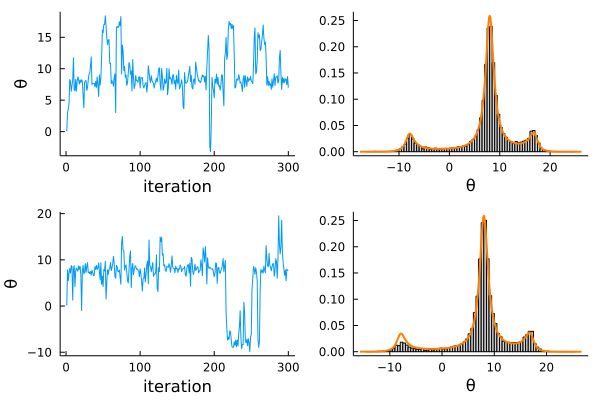

In [11]:
## test coupled kernel
nmcmc = 10000
thetachain1 = zeros(nmcmc)
thetachain2 = zeros(nmcmc)
state1 = rinit()
state2 = rinit()
thetachain1[1] = state1["position"]
thetachain2[1] = state2["position"]
for imcmc in 2:nmcmc
    state_meh = rinit()
    c1 = coupledgibbskernel(state1, state_meh)
    c2 = coupledgibbskernel(state_meh, state2)
    state1 = c1["state1"]
    state2 = c2["state2"]
    thetachain1[imcmc] = state1["position"]
    thetachain2[imcmc] = state2["position"]
end
# trace plots and histograms
l = @layout [a  b; c d]
p1 = plot(1:300, thetachain1[1:300], legend = false, xlab = "iteration", ylab = "\\theta")
p2 = histogram(thetachain1[200:nmcmc], label = "mcmc", normed = true, xlab = "\\theta")
p2 = plot!(normalizedtargetpdf, seriescolor=:darkorange1, label = "target", linewidth = 2)
p3 = plot(1:300, thetachain2[1:300], legend = false, xlab = "iteration", ylab = "\\theta")
p4 = histogram(thetachain2[200:nmcmc], label = "mcmc", normed = true, xlab = "\\theta")
p4 = plot!(normalizedtargetpdf, seriescolor=:darkorange1, label = "target", linewidth = 2)
plot(p1, p2, p3, p4, layout = l)

#### TV upper bounds

We first use the coupling to assess the rate of convergence of the Gibbs sampler.

In [12]:
## function to sample meeting times of two chains with a lag
function sample_meetingtime(rinit, kernel, coupledkernel, lag)
    time1 = 0
    state1 = rinit()
    state2 = rinit()
    if (lag > 0)
        for time in 1:lag
            time1 = time1 + 1
            state1 = kernel(state1)
        end
    end
    meeting = Inf
    while isinf(meeting)
        time1 = time1 + 1
        result = coupledkernel(state1, state2)
        state1 = result["state1"]
        state2 = result["state2"]
        if (result["identical"])
            meeting = time1
        end
    end
    return meeting
end;

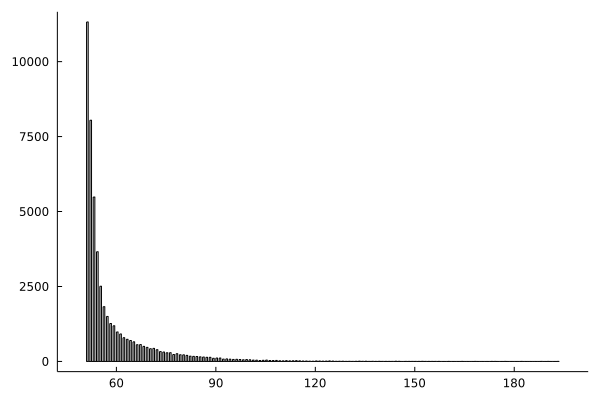

In [13]:
nrep = 50000
lag = 50
meetingtimes = zeros(nrep)
Threads.@threads for irep in 1:nrep
    meetingtimes[irep] = sample_meetingtime(rinit, gibbskernel, coupledgibbskernel, lag)
end
histogram(meetingtimes)

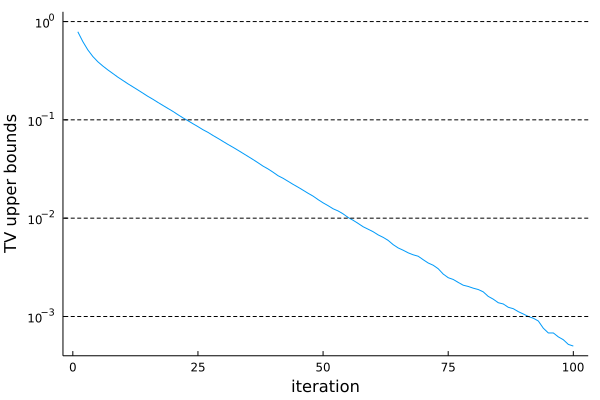

In [14]:
xseq = 1:100
ubounds = [mean(max.(0, ceil.((meetingtimes .- x .- lag) ./ lag))) for x in xseq]
plot(xseq, ubounds, yaxis=:log, ytick = [1, 0.1, 0.01, 0.001], xlab = "iteration", ylab = "TV upper bounds")
hline!([1, 0.1, 0.01, 0.001], linestyle=:dash, colour = :black)

From the above we might want to set $L=50$, $k=50$, $m=250$.

### Unbiased estimators

The following samples two chains, with a lag $L$, up to time $\max(m, \tau)$.

In [15]:
function sample_coupled_chains(rinit, kernel, coupledkernel; lag::Int64=1, m::Int64=1, max_iterations::Int64=1000000)
    state1 = rinit()
    state2 = rinit()
    dimpos = length(state1["position"])
    nrowsamples1 = m + lag + 10
    samples1 = zeros(nrowsamples1, dimpos)
    samples2 = zeros(nrowsamples1-lag, dimpos)
    samples1[1,:] .= state1["position"]
    samples2[1,:] .= state2["position"]
    time = 0
    if (lag > 0)
        for s in 1:lag
            time = time + 1
            state1 = kernel(state1)
            samples1[time+1,:] .= state1["position"]
        end
    end
    meeting = Inf
    while (time < max(meeting, m)) & (time < max_iterations)
        time = time + 1
        if isfinite(meeting)
            state1 = kernel(state1)
            state2 = state1
        else 
            result = coupledkernel(state1, state2)
            state1 = result["state1"]
            state2 = result["state2"]
            if (result["identical"])
                meeting = time
            end
        end
        if (time + 1) > nrowsamples1
          new_rows = nrowsamples1
          nrowsamples1 = nrowsamples1 + new_rows
          samples1 = vcat(samples1, zeros(new_rows, dimpos))
          samples2 = vcat(samples2, zeros(new_rows, dimpos))
        end
        samples1[time+1,:] .= state1["position"]
        samples2[time-lag+1,:] .= state2["position"]
    end
    samples1 = samples1[1:(time+1),:]
    samples2 = samples2[1:(time-lag+1),:]
    cost = lag + 2*(meeting - lag) + max(0, time - meeting)
    return Dict("samples1" => samples1, "samples2" => samples2, "meeting" => meeting, "cost" => cost)
end;

From the coupled chains, we define the unbiased estimator $H_\ell=h(X_\ell)+\sum_{j\geq 1} \{h(X_{\ell+jL})-h(Y_{\ell+(j-1)L}\}$. We can interrupt the summation when $h(X_{\ell+jL})-h(Y_{\ell+(j-1)L}=0$.

In [16]:
function Hfromchains(cchains, h, k)
    s = size(cchains["samples1"])
    nsamples1 = s[1]
    dimpos = s[2]
    meeting = cchains["meeting"]
    lag = nsamples1 - size(cchains["samples2"])[1]
    result = h(cchains["samples1"][k+1,:])
    meetingreached = false
    j = 0
    while !meetingreached
        j = j + 1
        if (k+j*lag<meeting)
            result +=  h(cchains["samples1"][k+j*lag+1,:]) - h(cchains["samples2"][k+(j-1)*lag+1,:])
        else
            meetingreached=true
        end
    end
    return result
end;

We can then obtain $H_{k:m}$ by averaging $H_{\ell}$ for $\ell=k,\ldots,m$.

estimate: -14.56+/-0.14
ground truth: -14.681


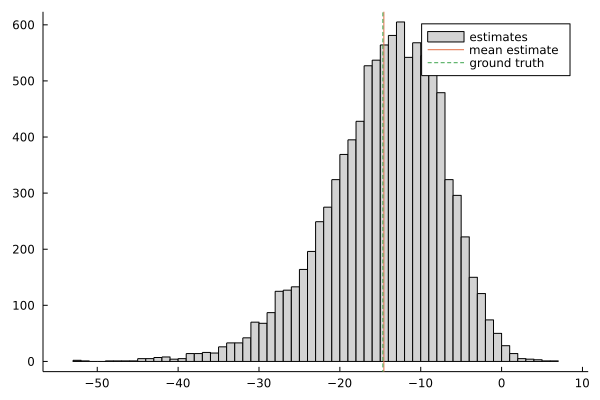

In [17]:
h(x)=cos(x[1])*(x[1]^2)
nrep = 10000
lag = 50
k = 50
m = 250
uestimates = zeros(nrep)
Threads.@threads for irep in 1:nrep
    cchains = sample_coupled_chains(rinit, gibbskernel, coupledgibbskernel; lag = lag, m = m)
    uestimates[irep] = mean([Hfromchains(cchains, h, ell) for ell in k:m])
end
println("estimate: ", round(mean(uestimates);digits=2), "+/-", round(2*sqrt(var((uestimates))/nrep);digits=2))
println("ground truth: ", round(qoi; digits=3))
histogram(uestimates, legend = true, label = "estimates")
vline!([mean(uestimates) qoi], linestyle = [:solid :dash], label = ["mean estimate" "ground truth"])

#### Bias cancellation: trying different formulas

Here we try to compute $H_{k:m}$ directly, not by computing $H_\ell$ for different $\ell$ and then averaging.

In [18]:
function Hbarfromchains_fixed(cchains, h, k, m)
    s = size(cchains["samples1"])
    nsamples1 = s[1]
    dimpos = s[2]
    meeting = cchains["meeting"]
    lag = nsamples1 - size(cchains["samples2"])[1]
    mcmcestimator = mean([h(cchains["samples1"][t+1,:]) for t in k:m])
    bcestimator = 0
    for t in (k+lag):(meeting-1)
        delta = h(cchains["samples1"][t+1,:]) - h(cchains["samples2"][t-lag+1,:])
        weight = floor((t-k) / lag) - ceil(max(lag, t-m)/lag) + 1
        bcestimator += weight * delta
    end
    return mcmcestimator + bcestimator / (m-k+1)
end
function Hbarfromchains_buggy(cchains, h, k, m)
    s = size(cchains["samples1"])
    nsamples1 = s[1]
    dimpos = s[2]
    meeting = cchains["meeting"]
    lag = nsamples1 - size(cchains["samples2"])[1]
    mcmcestimator = mean([h(cchains["samples1"][t+1,:]) for t in k:m])
    bcestimator = 0
    for t in (k+lag):(meeting-1)
        delta = h(cchains["samples1"][t+1,:]) - h(cchains["samples2"][t-lag+1,:])
        weight = min(m-k+1, ceil((t-k)/lag))
        bcestimator += weight * delta
    end
    return mcmcestimator + bcestimator / (m-k+1)

end
;

In [19]:
Random.seed!(123);
nrep = 10000
lag = 50
k = 53
m = 247
agreement12 = zeros(nrep)
agreementnewold = zeros(nrep)
taulargerthanm = zeros(nrep)
Threads.@threads for irep in 1:nrep
    cchains = sample_coupled_chains(rinit, gibbskernel, coupledgibbskernel; lag = lag, m = m)
    uestimate = mean([Hfromchains(cchains, h, t) for t in k:m])
    uestimate2 = Hbarfromchains_fixed(cchains, h, k, m)
    uestimate_old = Hbarfromchains_buggy(cchains, h, k, m)
    agreement12[irep] = abs(uestimate-uestimate2)<1e-10
    agreementnewold[irep] = abs(uestimate2-uestimate_old)<1e-10
    taulargerthanm[irep] = cchains["meeting"] > m
end
println("Bruteforce versus Anthony's formula: ", mean(agreement12) * 100, "% agreement")
println("Anthony's formula versus old buggy formula: ", mean(agreementnewold) * 100, "% agreement")
println("tau larger than m: ", mean(agreementnewold) * 100, "% of the time")

Bruteforce versus Anthony's formula: 100.0% agreement
Anthony's formula versus old buggy formula: 98.83999999999999% agreement
tau larger than m: 98.83999999999999% of the time


In [20]:
Random.seed!(123);
nrep = 10000
lag = 2
k = 3
m = 6
agreement12 = zeros(nrep)
agreementnewold = zeros(nrep)
taulargerthanm = zeros(nrep)
Threads.@threads for irep in 1:nrep
    cchains = sample_coupled_chains(rinit, gibbskernel, coupledgibbskernel; lag = lag, m = m)
    uestimate = mean([Hfromchains(cchains, h, t) for t in k:m])
    uestimate2 = Hbarfromchains_fixed(cchains, h, k, m)
    uestimate_old = Hbarfromchains_buggy(cchains, h, k, m)
    agreement12[irep] = abs(uestimate-uestimate2)<1e-10
    agreementnewold[irep] = abs(uestimate2-uestimate_old)<1e-10
    taulargerthanm[irep] = cchains["meeting"] > m
end
println("Bruteforce versus Anthony's formula: ", mean(agreement12) * 100, "% agreement")
println("Anthony's formula versus old buggy formula: ", mean(agreementnewold) * 100, "% agreement")
println("tau larger than m: ", mean(agreementnewold) * 100, "% of the time")

Bruteforce versus Anthony's formula: 100.0% agreement
Anthony's formula versus old buggy formula: 62.07% agreement
tau larger than m: 62.07% of the time


#### Comments

When k is chosen as a large quantile of $\tau$, and further when $m=5k$ or $m=10k$ as recommended for efficiency reasons, then the event $\{t>m\}$ becomes very unlikely. In that case the correct formula seems to match the old one. 

The problem with the old formula is more apparent when $\{t>m\}$ is likely.

Next we try to see if the problem is noticeable in terms of the bias.

In [ ]:
h(x)=cos(x[1])*(x[1]^2)
nrep = 500000
lag = 10
k = 10
m = 40
uestimates1 = zeros(nrep)
uestimates2 = zeros(nrep)
Threads.@threads for irep in 1:nrep
    cchains = sample_coupled_chains(rinit, gibbskernel, coupledgibbskernel; lag = lag, m = m)
    uestimates1[irep] = Hbarfromchains_fixed(cchains, h, k, m)
    uestimates2[irep] = Hbarfromchains_buggy(cchains, h, k, m)
end
println("estimate 1: ", round(mean(uestimates1);digits=2), "+/-", round(2*sqrt(var((uestimates1))/nrep);digits=2))
println("estimate 2: ", round(mean(uestimates2);digits=2), "+/-", round(2*sqrt(var((uestimates2))/nrep);digits=2))
println("ground truth: ", round(qoi; digits=3))



So we can see that indeed the wrong formula can lead, for certain choices of $k,m,L$, to visible biases.